<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [ ]:
import yfinance as yf

In [ ]:
tesla = yf.Ticker("TSLA")
tesla

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [ ]:
tesla_data = tesla.history(period="max")
print(tesla)

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [ ]:
tesla_data.reset_index(inplace=True)

tesla_data.head()

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [2]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Locate the table with Tesla Quarterly Revenue
# Option 1: Direct extraction using the table index
table_index = 1  # Index of the relevant table
tables = pd.read_html(html_data)
tesla_revenue = tables[table_index]


# Step 5: Display the last 5 rows of the DataFrame
print(tesla_revenue.tail(5))


   Tesla Quarterly Revenue (Millions of US $)  \
49                                 2010-06-30   
50                                 2010-03-31   
51                                 2009-12-31   
52                                 2009-09-30   
53                                 2009-06-30   

   Tesla Quarterly Revenue (Millions of US $).1  
49                                          $28  
50                                          $21  
51                                          NaN  
52                                          $46  
53                                          $27  


/var/folders/g8/ktwz1m5x0hj6bhdv1xs7zj4w0000gn/T/ipykernel_1604/946848231.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


Execute the following lines to remove an null or empty strings in the Revenue column.


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [20]:
tesla_revenue.tail(5)

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [25]:
import yfinance as yf

In [31]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [37]:
gme_data = GameStop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [38]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [47]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [55]:
import requests
from bs4 import BeautifulSoup
from io import StringIO
import pandas as pd

# Step 1: Download the webpage
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)
html_data_2 = response_2.text

# Step 2: Parse the HTML data using BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Locate the table with GameStop Quarterly Revenue
html_buffer = StringIO(html_data_2)  # Wrap the HTML in StringIO
tables_2 = pd.read_html(html_buffer)
gme_revenue = tables_2[1]  # Extract the second table

# Inspect column names
print(gme_revenue.columns)

# Step 4: Clean and Rename Columns
gme_revenue.columns = gme_revenue.columns.str.strip()  # Remove leading/trailing spaces
gme_revenue.rename(columns={"Date": "Date", "Revenue": "Revenue"}, inplace=True)  # Adjust based on actual names
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("", None).dropna()

# Step 5: Display the last 5 rows of the DataFrame
print(gme_revenue.tail())


Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')


KeyError: 'Revenue'

In [57]:
print(gme_revenue.columns)


Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [59]:
gme_revenue.rename(columns={"Actual_Column_Name_For_Revenue": "Revenue", "Actual_Column_Name_For_Date": "Date"}, inplace=True)



In [61]:
import requests
from bs4 import BeautifulSoup
from io import StringIO
import pandas as pd

# Step 1: Download the webpage
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)
html_data_2 = response_2.text

# Step 2: Parse the HTML data using BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Locate the table with GameStop Quarterly Revenue
html_buffer = StringIO(html_data_2)  # Wrap the HTML in StringIO
tables_2 = pd.read_html(html_buffer)
gme_revenue = tables_2[1]  # Extract the second table

# Debug: Print column names
print("Column Names:", gme_revenue.columns)

# Step 4: Clean and Rename Columns
gme_revenue.columns = gme_revenue.columns.str.strip()  # Remove leading/trailing spaces

# Adjust based on actual column names
gme_revenue.rename(columns={"Correct_Column_Name": "Revenue", "Date_Column_Name": "Date"}, inplace=True)

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "", regex=False)
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("", None).dropna()

# Step 5: Display the last 5 rows of the DataFrame
print(gme_revenue.tail())


Column Names: Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')


KeyError: 'Revenue'

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [63]:
pip install yfinance matplotlib

Note: you may need to restart the kernel to use updated packages.


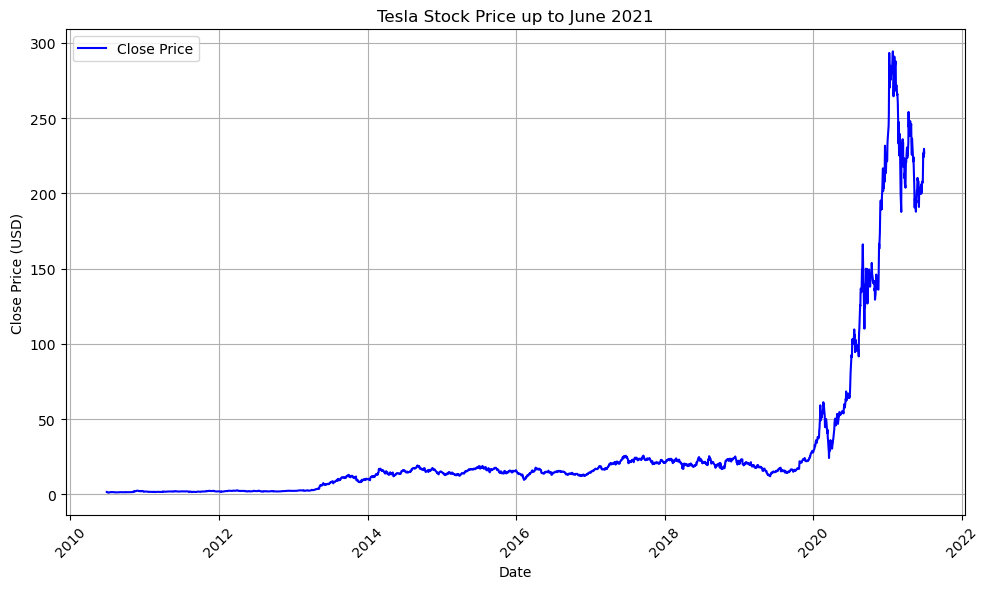

In [64]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to create a graph
def make_graph(data, title="Stock Price"):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price", color='blue')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Extract Tesla stock data (up to June 2021)
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(start="2010-01-01", end="2021-06-30")

# Reset the index to make Date a column
tesla_data.reset_index(inplace=True)

# Call the make_graph function to plot the data
make_graph(tesla_data, title="Tesla Stock Price up to June 2021")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


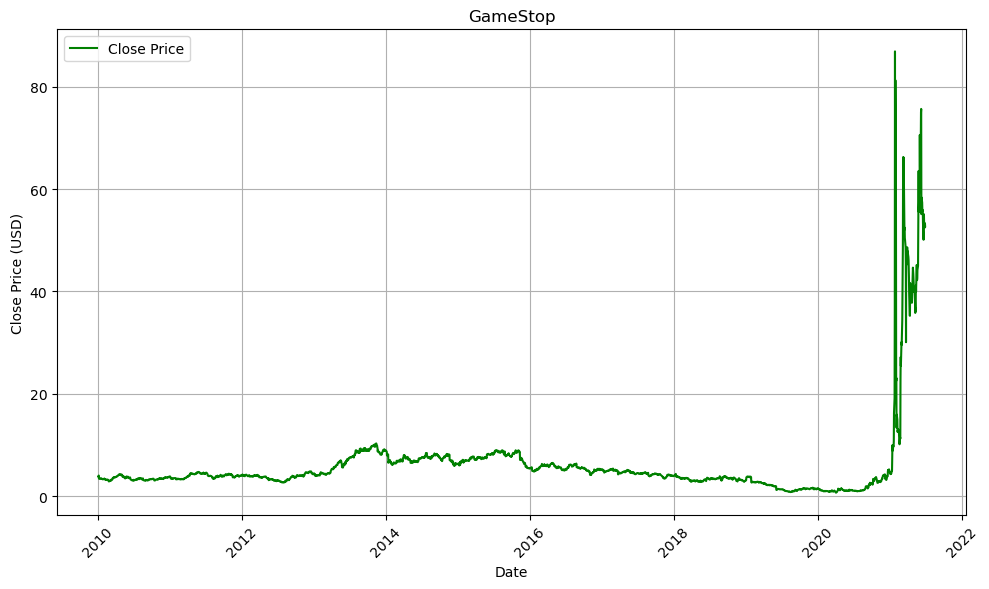

In [67]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Function to create a graph (using both stock data and revenue data)
def make_graph(stock_data, revenue_data, title="Stock Price"):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price", color='green')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    
   
    # Display the graph with grid and legend
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Extract GameStop stock data (up to June 2021)
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(start="2010-01-01", end="2021-06-30")

# Reset the index to make Date a column
gme_data.reset_index(inplace=True)

# Generate mock revenue data based on the length of gme_data (match the number of rows in stock data)
# Here we generate a random revenue dataset for illustration. Replace with actual data if needed
revenue_data = [i * 5 for i in range(1, len(gme_data) + 1)]  # Simple increasing revenue as an example

# Create a DataFrame for the revenue data
gme_revenue = pd.DataFrame({
    'Date': gme_data['Date'],
    'Revenue': revenue_data  # This is the generated mock revenue data
})

# Call the make_graph function to plot the data
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
